# Optimize Marketing Budget with Nonlinear Programming

## Introduction to CVXPY to maximize marketing ROI, conic optimization (or cone programming)

### 1. Attribution: How can we connect conversion events to specific campaigns?
### 2. Performance Estimation: How can we predict the performance of a campaign based on its allocated budget?
### 3. Optimization: How can we allocate budgets across various campaigns to maximize ROI?


In [6]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [4]:
TOTAL_BUDGET = 100_000

In [7]:
#Alpha and Beta constants

alphas = np.array([-9453.72, -8312.84, -7371.33])
betas = np.array([8256.21, 7764.20, 7953.36])

In [5]:
#Linearly spaced numbers
x = np.linspace(1, TOTAL_BUDGET, TOTAL_BUDGET)

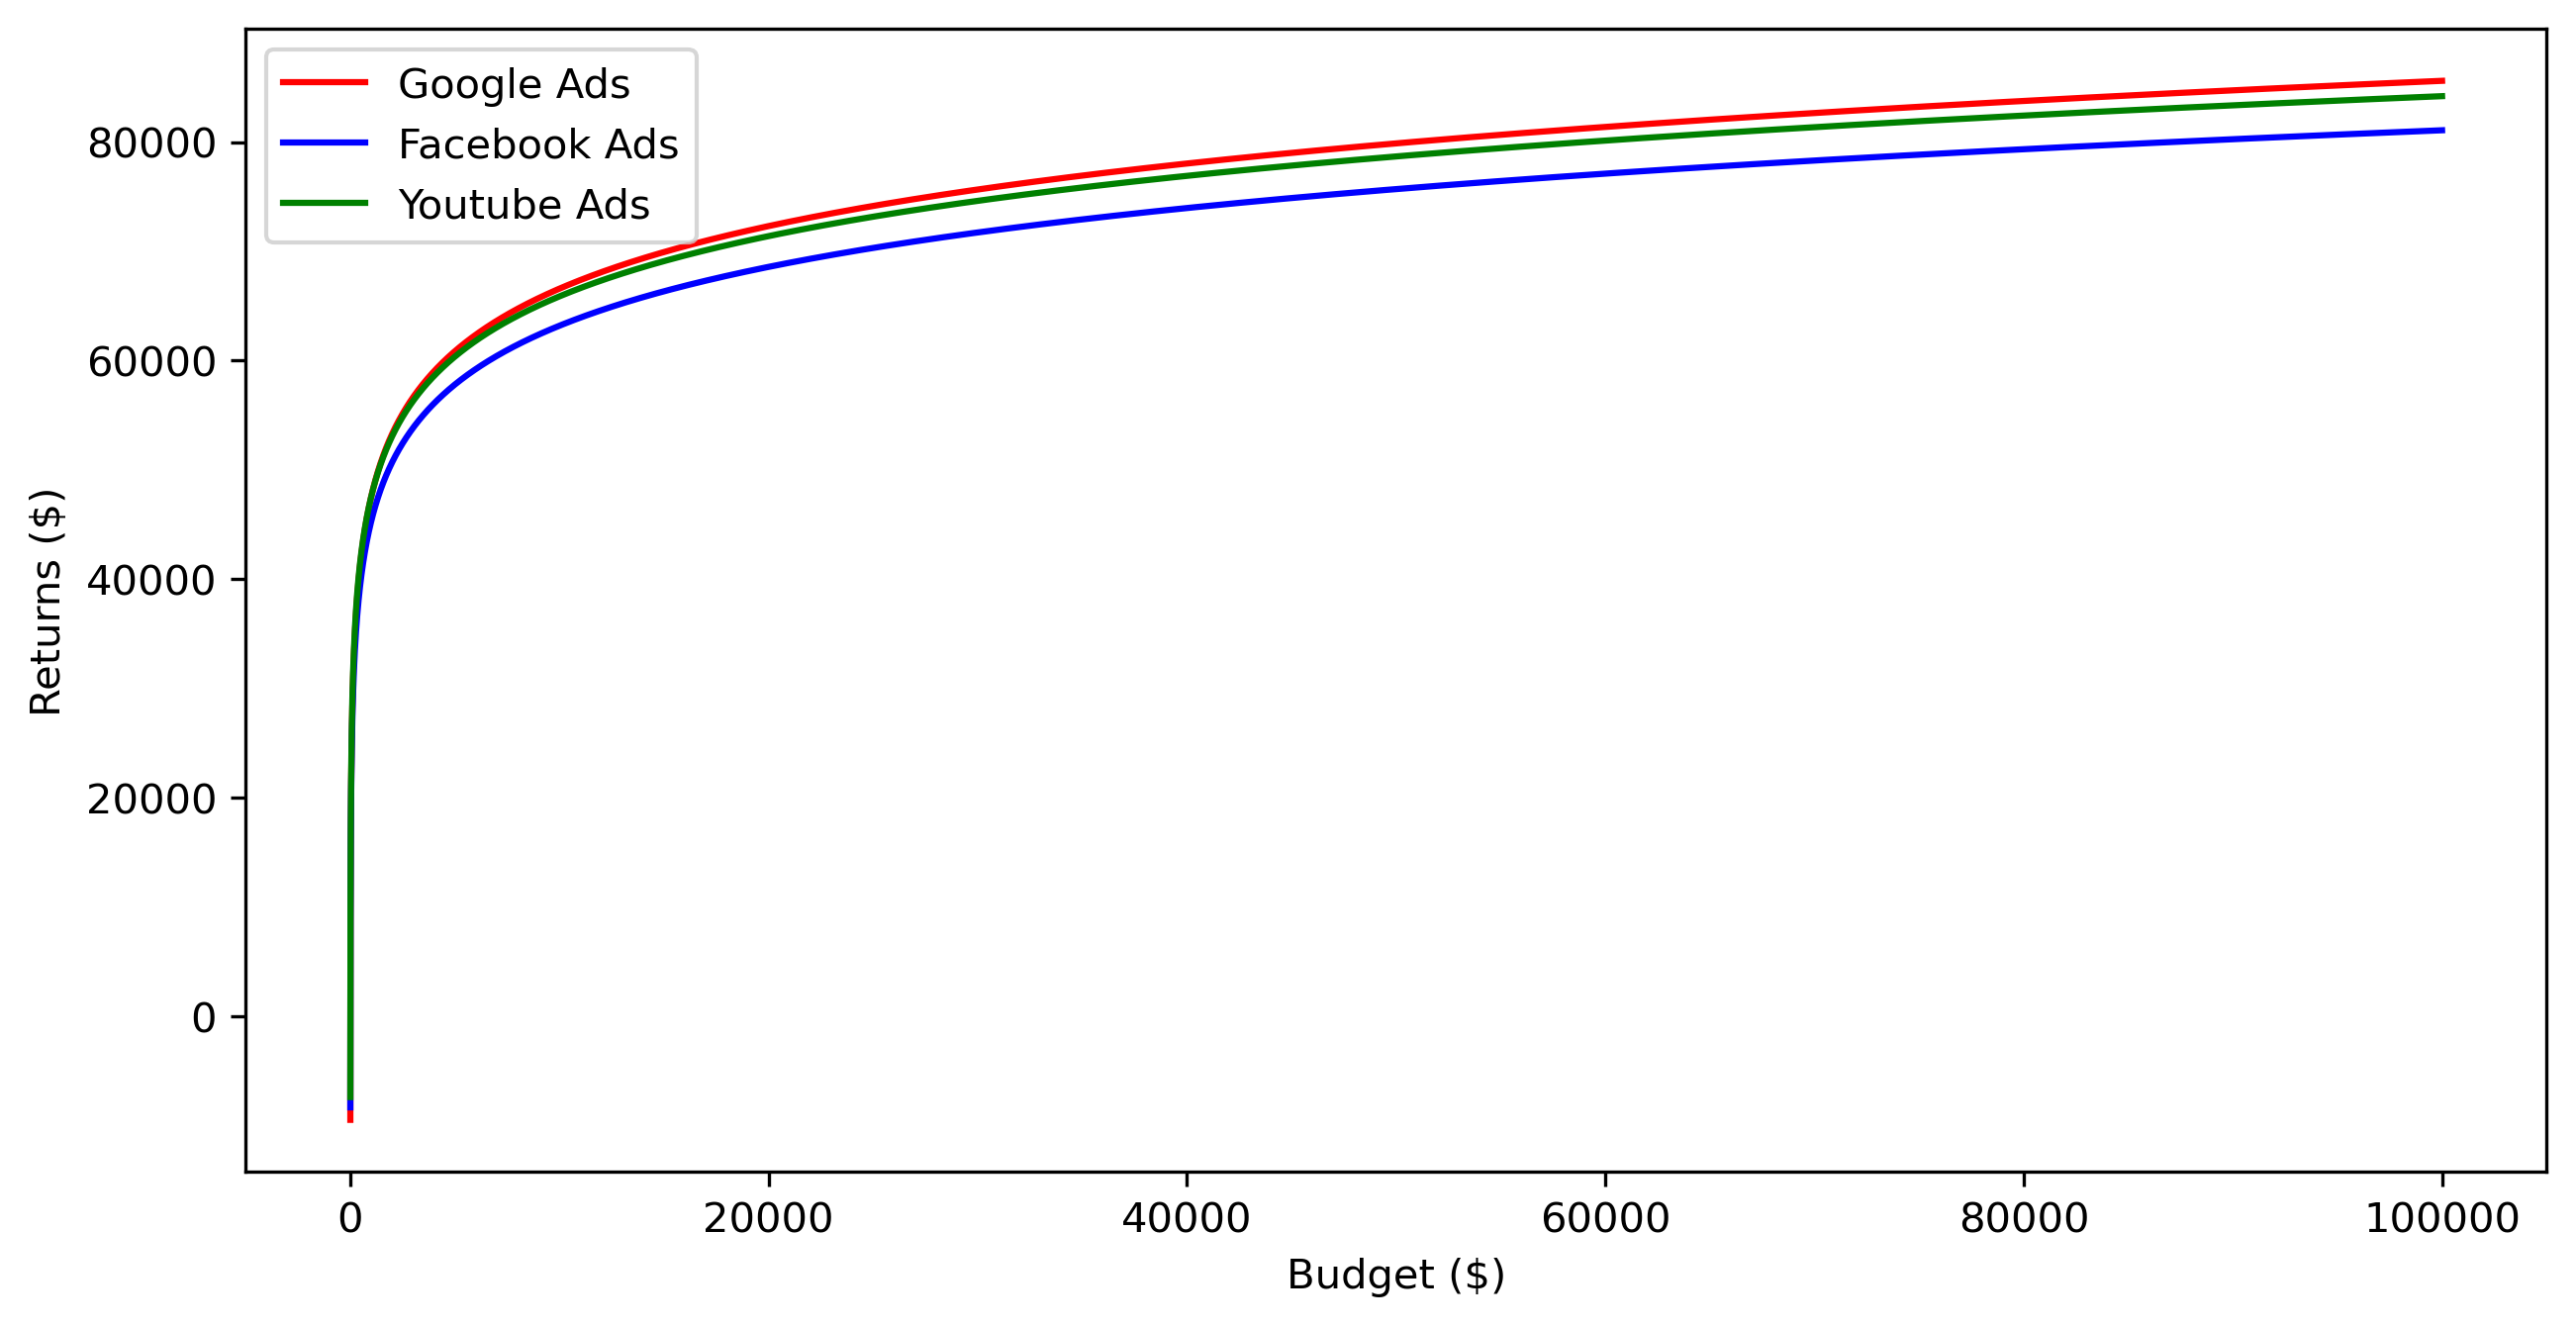

In [6]:
# plot the response curve
fig = plt.figure(figsize=(10,5), dpi=300)
plt.plot(x, alphas[0] + betas[0] * np.log(x), label ='Google Ads', color='red')
plt.plot(x, alphas[1] + betas[1] * np.log(x), label ='Facebook Ads', color='blue')
plt.plot(x, alphas[2] + betas[2] * np.log(x), label ='Youtube Ads', color='green')

plt.xlabel('Budget ($)')
plt.ylabel('Returns ($)')
plt.legend()

In [7]:
def greedy_optimization(TOTAL_BUDGET, alphas, betas, num_iterations=1000):
    #initialize the budget allocation and the best objective function, starting value
    google_budget = Facebook_budget = Youtube_budget = TOTAL_BUDGET / 3
    
    obj = alphas[0] + betas[0]*np.log(google_budget) + alphas[1] + betas[1]*np.log(Facebook_budget) + alphas[2] + betas[2]*np.log(Youtube_budget)
    
    for _ in range(num_iterations):
        #Generate a new random allocation
        random_allocation = np.random.dirichlet(np.ones(3)) * TOTAL_BUDGET
        google_budget_new, facebook_budget_new, youtube_budget_new = random_allocation
        
        #calculate the new objective function
        new_obj = alphas[0] + betas[0]*np.log(google_budget_new) + alphas[1] + betas[1]*np.log(facebook_budget_new) + alphas[2] + betas[2]*np.log(youtube_budget_new)
        
        # If the new allocation improves the objective value, keep it
        if new_obj > obj:
            obj = new_obj
            google_budget, Facebook_budget, Youtube_budget = google_budget_new, facebook_budget_new, youtube_budget_new
            
     # Return the best allocation and the corresponding objective value
    return obj, (google_budget, Facebook_budget, Youtube_budget)
    
    

In [8]:
#run the greedy optimization
returns, (best_google, best_facebook, best_youtube) = greedy_optimization(TOTAL_BUDGET, alphas, betas, num_iterations=10000)

#print the results
print('='*59 + '\n' + ' '*24 + 'Solution' + ' '*24 + '\n' + '='*59)
print(f'Returns = ${round(returns):,}')
print('Marketing Allocation:\n')
print(f"Google Budget is ${round(best_google,2):,}")
print(f"Facebook Budget is ${round(best_facebook,2):,}")
print(f"Youtube Budget is ${round(best_youtube,2):,}")

                        Solution                        
Returns = $224,540
Marketing Allocation:

Google Budget is $34,549.55
Facebook Budget is $32,312.15
Youtube Budget is $33,138.3


## CVXPY library, ECOS solver

In [2]:
import cvxpy as cp

In [11]:
# Variables

google = cp.Variable(pos=True)
facebook = cp.Variable(pos=True)
youtube = cp.Variable(pos=True)

#Constraint
constraint = [google+facebook+youtube <= TOTAL_BUDGET]

#Objective
obj = cp.Maximize(alphas[0] + betas[0] * cp.log(google)
                 + alphas[1] + betas[1] * cp.log(facebook)
                 + alphas[2] + betas[2] * cp.log(youtube))

In [14]:
#Solve
prob = cp.Problem(obj,constraint)
prob.solve(solver='ECOS', verbose=True)

                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) Jan 15 03:43:04 PM: Your problem has 3 variables, 1 constraints, and 0 parameters.
(CVXPY) Jan 15 03:43:04 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 15 03:43:04 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 15 03:43:04 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 15 03:43:04 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jan 15 03:43:04 PM: Compiling problem (target solver=ECOS).
(CVXP

224540.14986124402

In [13]:
# Print solutions
print('='*59 + '\n' + ' '*24 + 'Solution' + ' '*24 + '\n' + '='*59)
print(f'Status = {prob.status}')
print(f'Returns = ${round(prob.value):,}\n')
print('Marketing allocation:')
print(f' - Google Ads   = ${round(google.value):,}')
print(f' - Facebook Ads = ${round(facebook.value):,}')
print(f' - Youtube Ads  = ${round(youtube.value):,}')

                        Solution                        
Status = optimal
Returns = $224,540

Marketing allocation:
 - Google Ads   = $34,438
 - Facebook Ads = $32,386
 - Youtube Ads  = $33,175


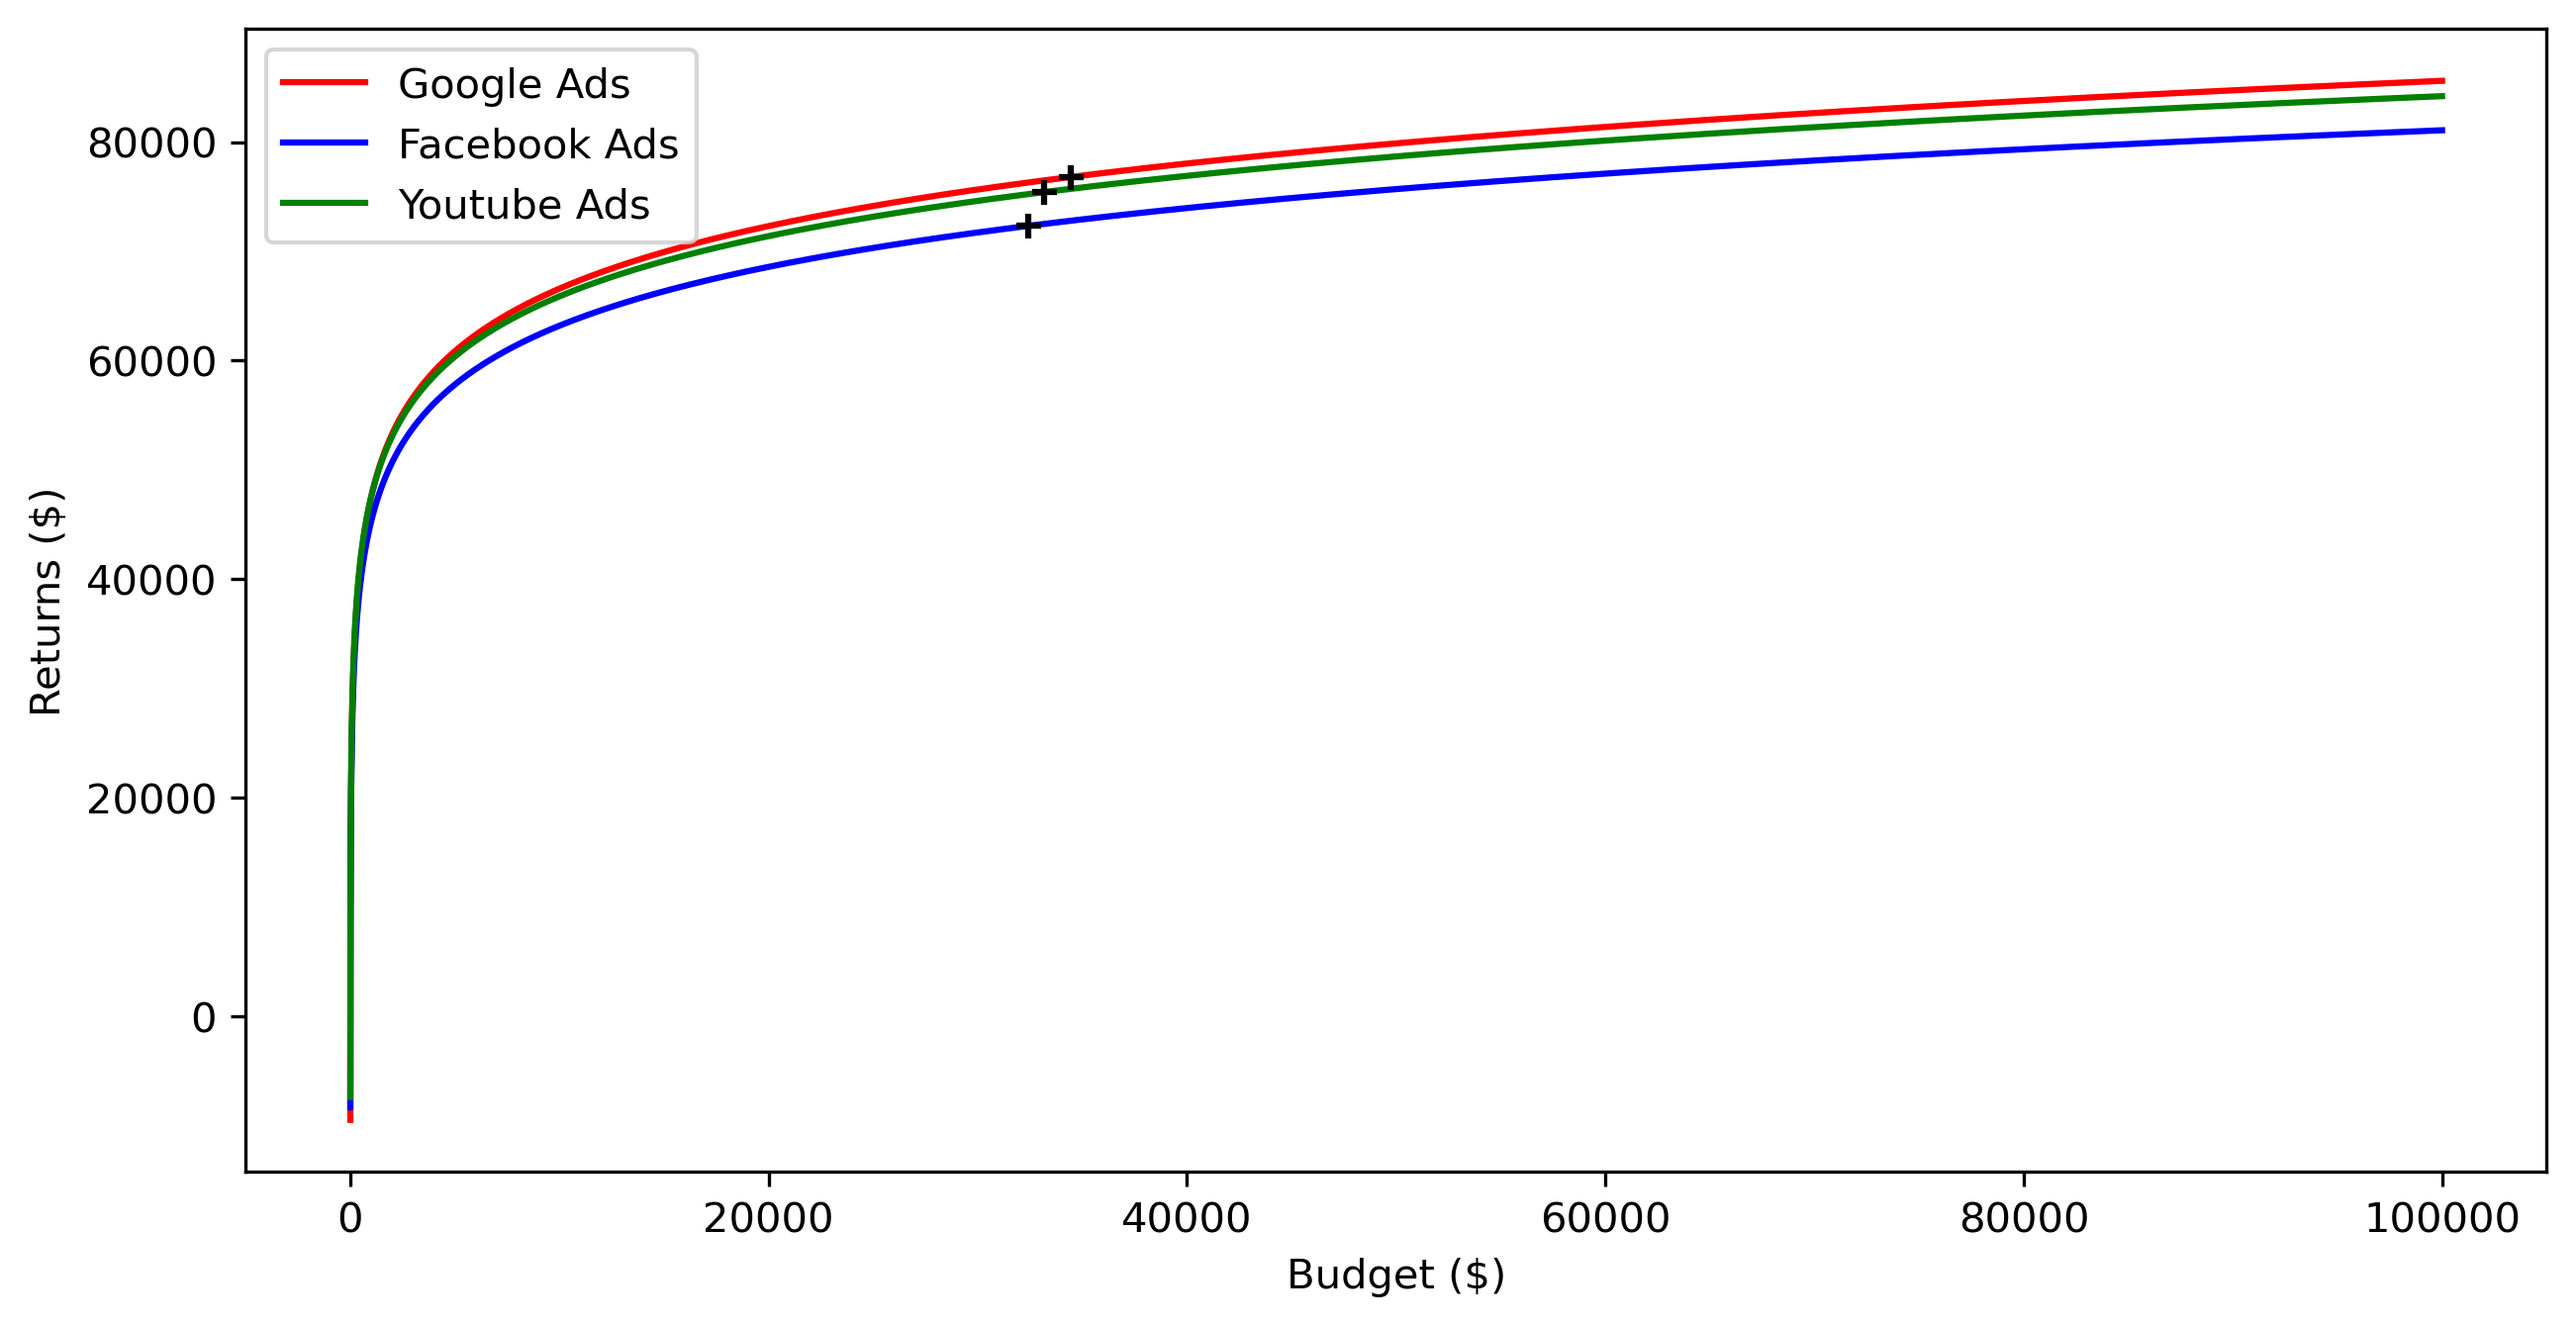

In [17]:
x = np.linspace(1, TOTAL_BUDGET, TOTAL_BUDGET)

# Plot the functions and the results
fig = plt.figure(figsize=(10, 5), dpi=300)

plt.plot(x, alphas[0] + betas[0] * np.log(x), color='red', label='Google Ads')
plt.plot(x, alphas[1] + betas[1] * np.log(x), color='blue', label='Facebook Ads')
plt.plot(x, alphas[2] + betas[2] * np.log(x), color='green', label='Youtube Ads')

# Plot optimal points
plt.scatter([google.value, facebook.value, youtube.value],
            [alphas[0] + betas[0] * np.log(google.value),
             alphas[1] + betas[1] * np.log(facebook.value),
             alphas[2] + betas[2] * np.log(youtube.value)],
            marker="+", color='black', zorder=10)

plt.xlabel('Budget ($)')
plt.ylabel('Returns ($)') 
plt.legend()
plt.show()